# SHAP for Regression - PD Data (subset)

## Get the data

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
from siuba import _, filter, mutate, select, arrange, group_by
import shap
from sklearn.model_selection import train_test_split

### Read in the raw file and Split into Response and Covariates

In [3]:
raw = pd.read_csv("data/pd_train_sev.csv")

In [4]:
np.shape(raw)

(71606, 52)

In [5]:
X = raw >> select(_.X_VAR9, _.X_VAR4, _.X_VAR16, _.X_VAR24)
y = raw[["severity"]]
print(np.shape(X))
print(np.shape(y))

(71606, 4)
(71606, 1)


In [7]:
X.head

<bound method NDFrame.head of        X_VAR9  X_VAR4  X_VAR16  X_VAR24
0           7      27        7        3
1           4      17        4        3
2           7      21        7        1
3           7      24        7        3
4           7      15        7        3
...       ...     ...      ...      ...
71601       1      21        1        2
71602       4      29        4        6
71603       7      28        7        3
71604       2      24        2        2
71605       4      26        4        6

[71606 rows x 4 columns]>

### Split into Train and Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(47976, 4)
(47976, 1)
(23630, 4)
(23630, 1)


In [12]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

## Create the Model

In [15]:
param = {'max_depth': 5, 'eta': 0.3, 'objective': 'reg:pseudohubererror', "eval_metric":"mae", "alpha":0.1, "gamma":0.1}

bst = xgb.train(param, dtrain, 10)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

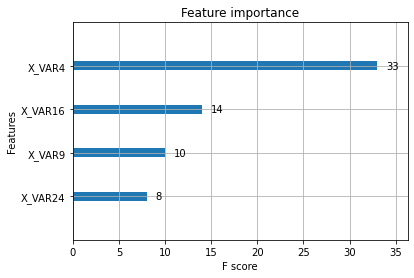

In [16]:
xgb.plot_importance(bst)

## View Predictions

In [20]:
preds = bst.predict(dtest)

In [22]:
preds

array([1604.1527, 1976.6902, 2554.632 , ..., 2091.3857, 2433.2927,
       2056.6755], dtype=float32)

In [25]:
bst.evals_result

AttributeError: 'Booster' object has no attribute 'evals_result'

## Calculate SHAP Values

In [17]:
shap_values = shap.TreeExplainer(bst).shap_values(X_test)

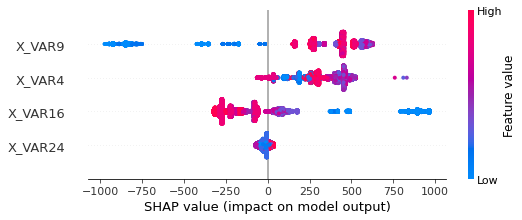

In [18]:
shap.summary_plot(shap_values, X_test)

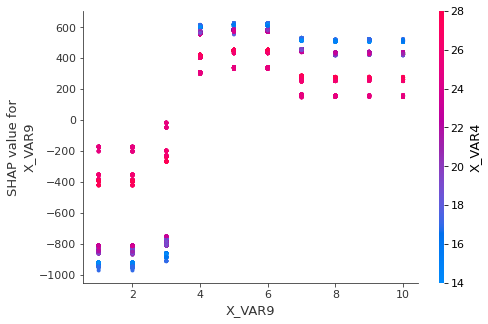

In [27]:
shap.dependence_plot("X_VAR9", shap_values, X_test)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


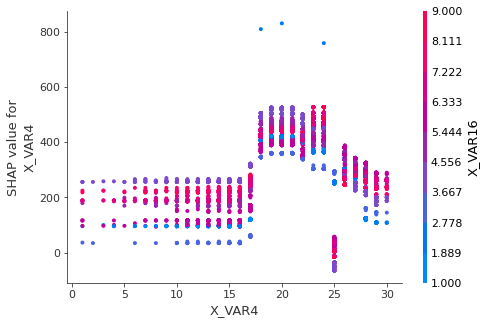

In [28]:
shap.dependence_plot("X_VAR4", shap_values, X_test)

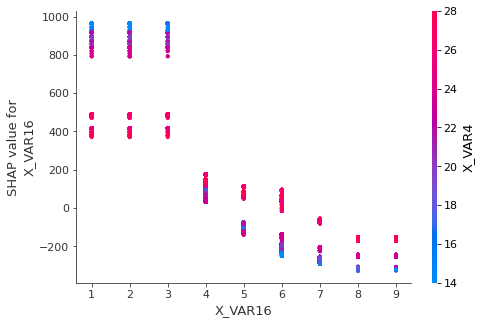

In [29]:
shap.dependence_plot("X_VAR16", shap_values, X_test)